# PREDICTION OF CAR PRICES USING LINEAR REGRESSION

![](car.JPG)

# PURPOSE

The purpose of car price prediction is to estimate the value of a car in the market based on various factors, such as its make and model, year of manufacture, mileage, condition, and location. Car price prediction is useful for buyers who want to make an informed decision about purchasing a car, as well as for sellers who want to set a fair price for their vehicle. It can also be used by insurance companies, banks, and other financial institutions to determine the value of a car for insurance or loan purposes.

# HERE "PRICE" WILL BE THE TARGET VALUE FOR WHICH WE ARE DOING THE PREDICTION

<b> Importing Packages </b>

In [1]:
import pandas as pd #use for working with datasets
import numpy as np #use to provide array objects
import matplotlib.pyplot as plt #use to make interactive visualizations 
import seaborn as sns #use to plot functions operated on dataframes and arrays

<b> Reading of dataset </b>

In [2]:
car_price = pd.read_csv("Automobile.csv", index_col=0)
car_price

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [3]:
car_price.set_index('index', inplace=True)
car_price

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0


<b> Showing First Five Data </b>

In [4]:
car_price.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


<b> Showing Dimensions of the original dataframe </b>

In [5]:
car_price.shape #use to find dimensions of the dataframe

(61, 9)

<b> Showing the data types </b>

In [7]:
car_price.dtypes #describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted

company              object
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
average-mileage       int64
price               float64
dtype: object

<b> Checking of null value </b>

In [8]:
car_price.info() #checking the presence of null-value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


<b> Removing null value from the original dataset </b>

In [10]:
car_price.dropna(inplace=True) #removing the null-value from the original dataset

<b> Checking of null value removal </b>

In [11]:
car_price.info() #checking of the removal of null-value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     object 
 1   body-style        58 non-null     object 
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     object 
 5   num-of-cylinders  58 non-null     object 
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.5+ KB


<b> Analysing of the dataset shape after removing null values </b>

In [12]:
car_price.shape

(58, 9)

<b> Identifying the Unique Values </b>

In [13]:
car_price.company.unique() #To find the unique values in a Series Object

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<b> Detection of Missing Values </b>

In [14]:
car_price.isna().sum().to_frame() #use to detect missing values for an array-like object

,0
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,0


<b> Selecting the categorical values </b>

In [15]:
category_cols = car_price.select_dtypes(['object']).columns
category_cols

Index(['company', 'body-style', 'engine-type', 'num-of-cylinders'], dtype='object')

In [16]:
for col in category_cols:
    print(car_price[col].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan' 'porsche' 'toyota'
 'volkswagen' 'volvo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


<b> Price growth of cars based on body style over the years </b>

<AxesSubplot:xlabel='body-style', ylabel='price'>

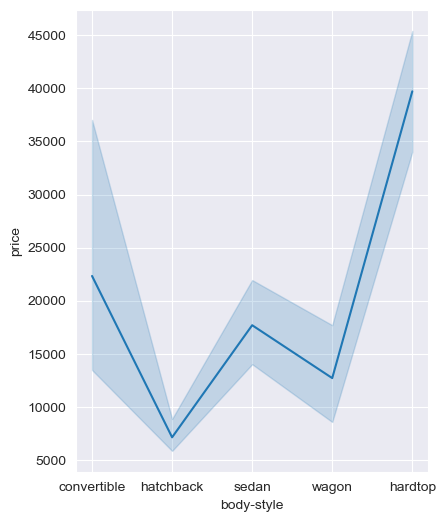

In [17]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
plt.subplot(121)
sns.lineplot(data=car_price, x="body-style", y="price")

The above graphical representation is highly inconclusive as there is major fluctuation in car prices based on the body-type.

# PURPOSE OF LABEL ENCODER

The purpose of Label Encoder is to transform categorical variables into numerical variables so that machine learning algorithms can process them more easily. Label Encoder assigns a unique numerical value to each category in the categorical variable. For example, if the categorical variable is "fruit" and it has three categories (apple, banana, and orange), Label Encoder will assign the value 0 to apple, 1 to banana, and 2 to orange.

<b> Importing Label Encoder </b>

In [21]:
from sklearn.preprocessing import LabelEncoder

<b> Defining Label Encoder </b>

In [22]:
le = LabelEncoder()
#encoding the labels in the column name "company"
car_price['company'] = le.fit_transform(car_price['company'])

<b> Visualization of the dataset </b>

In [23]:
car_price.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,0,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,0,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,1,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,1,sedan,99.4,176.6,ohc,five,115,18,17450.0


<b> Encoding labels in engine-type and body-style columns </b>

In [24]:
car_price['engine-type'] = le.fit_transform(car_price['engine-type'])
car_price['body-style'] = le.fit_transform(car_price['body-style'])

<b> Displaying the dataset </b>

In [25]:
car_price.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,four,111,21,13495.0
1,0,0,88.6,168.8,0,four,111,21,16500.0
2,0,2,94.5,171.2,4,six,154,19,16500.0
3,1,3,99.8,176.6,2,four,102,24,13950.0
4,1,3,99.4,176.6,2,five,115,18,17450.0


<b> Replacing the categorical value into numerical value of the column "num-of-cylinders" by using "Replace" Function </b>


In [26]:
car_price = car_price.replace({'num-of-cylinders':{
                              'four':4,
                              'six':6,
                              'five':5,
                              'three':3,
                              'two':2,
                              'twelve':12,
                              'eight':8}
                              })

<b> Displaying the dataset </b>

In [27]:
car_price.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,4,111,21,13495.0
1,0,0,88.6,168.8,0,4,111,21,16500.0
2,0,2,94.5,171.2,4,6,154,19,16500.0
3,1,3,99.8,176.6,2,4,102,24,13950.0
4,1,3,99.4,176.6,2,5,115,18,17450.0


<b> Executing Correlation and displaying it through colormap </b>

In [28]:
car_price.corr().style.background_gradient(cmap="YlGnBu")

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
company,1.000000,0.190051,-0.012603,-0.047085,0.126324,-0.097692,-0.187885,0.242883,-0.205502
body-style,0.190051,1.000000,0.432152,0.322310,-0.033776,-0.007318,-0.135047,0.022190,-0.110904
wheel-base,-0.012603,0.432152,1.000000,0.881866,0.070895,0.516737,0.509146,-0.547084,0.663085
length,-0.047085,0.322310,0.881866,1.000000,0.091408,0.633069,0.727067,-0.780370,0.788465
engine-type,0.126324,-0.033776,0.070895,0.091408,1.000000,0.304646,0.247286,-0.204637,0.191193
num-of-cylinders,-0.097692,-0.007318,0.516737,0.633069,0.304646,1.000000,0.843596,-0.616336,0.765225
horsepower,-0.187885,-0.135047,0.509146,0.727067,0.247286,0.843596,1.000000,-0.842615,0.901707
average-mileage,0.242883,0.022190,-0.547084,-0.780370,-0.204637,-0.616336,-0.842615,1.000000,-0.770217
price,-0.205502,-0.110904,0.663085,0.788465,0.191193,0.765225,0.901707,-0.770217,1.000000


<b> Heat Map Visualization of Correlation Matrix </b>

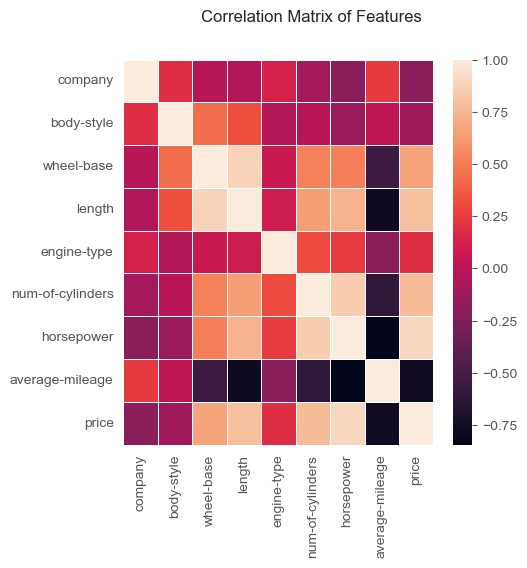

In [29]:
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
sns.heatmap(data=car_price.corr(),
           annot=False,
           linewidth=.6)
plt.suptitle("Correlation Matrix of Features")
plt.show()

<b> Displaying the graphical representation of "Price" using histogram </b>

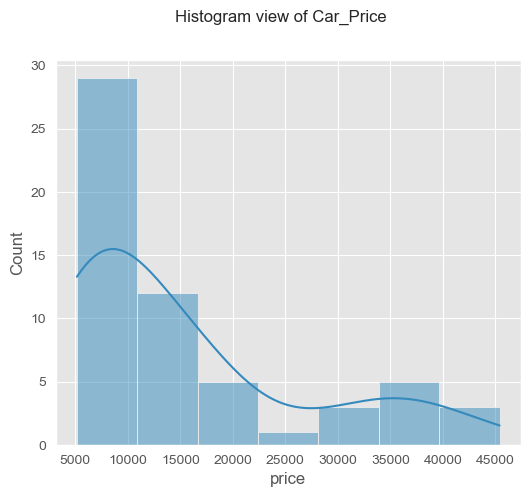

In [30]:
plt.figure(figsize=(6,5))
plt.style.use("ggplot")
sns.histplot(data=car_price, x="price",
           kde=True,
           linewidth=.6)

plt.suptitle("Histogram view of Car_Price")
plt.show()

<b> Displaying the graphical representation of "Price" using Boxplot </b>

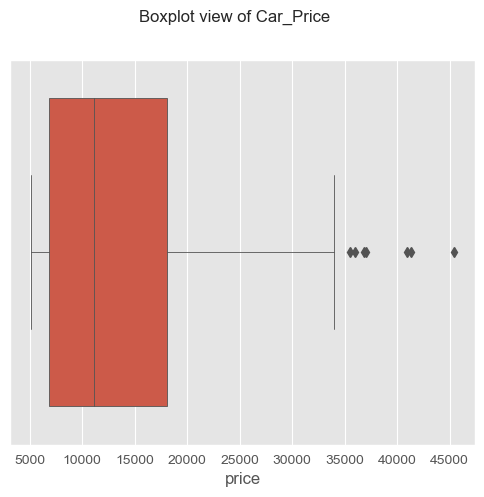

In [31]:
plt.figure(figsize=(6,5))
plt.style.use("ggplot")
sns.boxplot(data=car_price, x="price",
           linewidth=.6)
plt.suptitle("Boxplot view of Car_Price")
plt.show()

<b> Visualization of Car Price Distribution and Spread using Histogram and Box Plot </b>

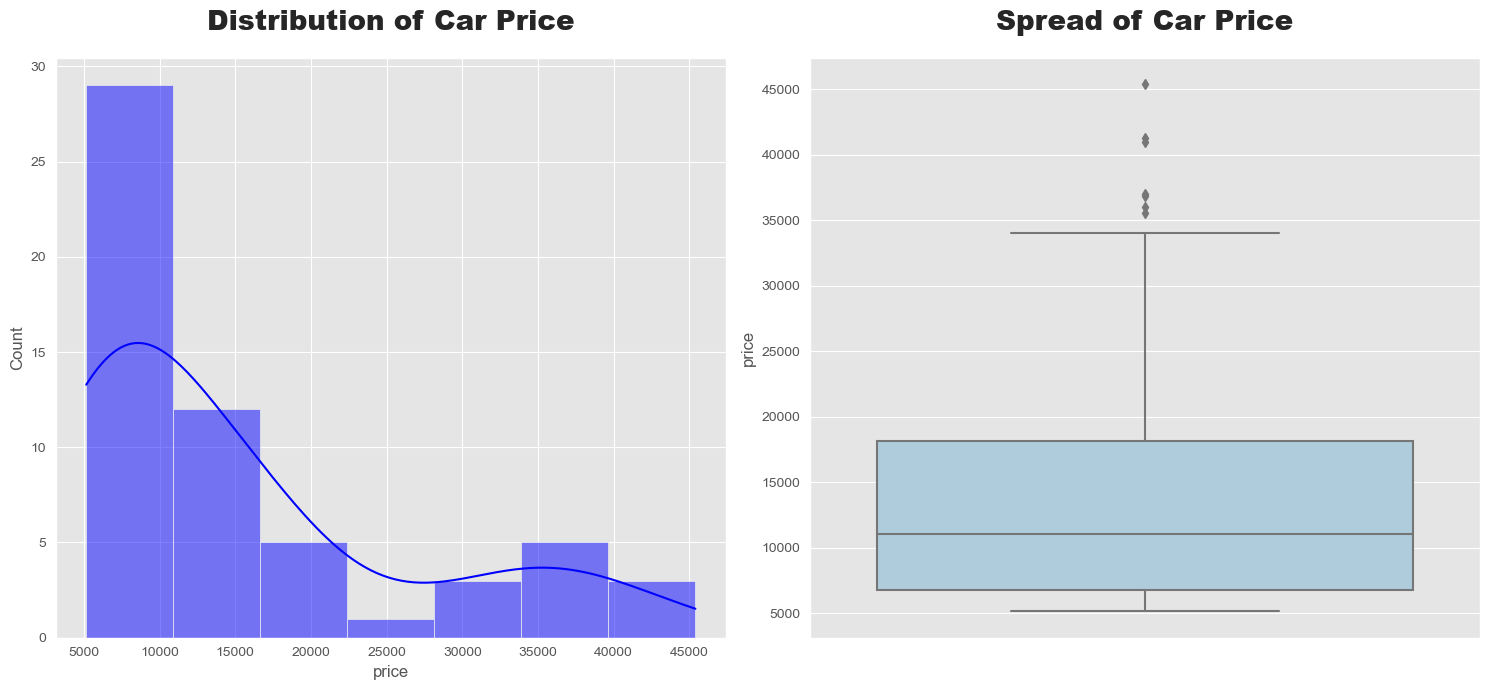

In [32]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(car_price["price"],color="blue",kde=True)
plt.title("Distribution of Car Price",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=car_price["price"],palette="Paired")
plt.title("Spread of Car Price",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

<b> Displaying Skew Value </b>

In [33]:
car_price.price.skew()

1.2319336876831786

# Variation of Car price using lineplot

<b> Price vs Company </b>

<AxesSubplot:xlabel='company', ylabel='price'>

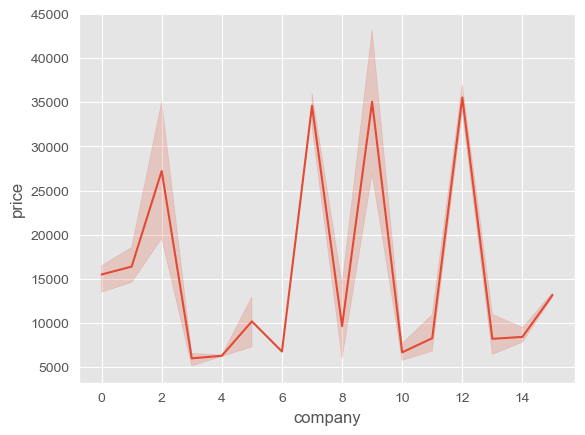

In [34]:
sns.lineplot(data=car_price, y="price", x="company")

The graph is highly inconclusive as major fluctuations are observed

<b> Price vs Number of Cylinders </b>

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

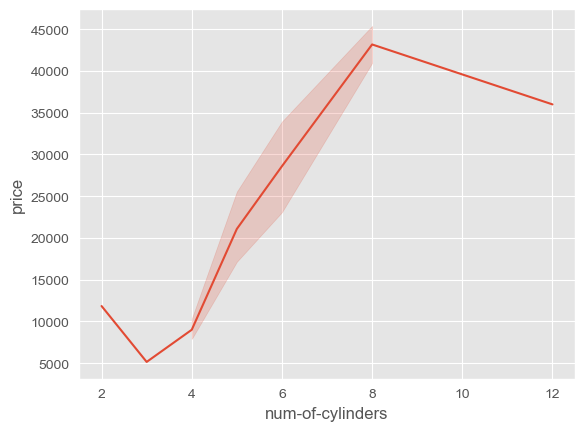

In [35]:
sns.lineplot(data=car_price, y="price", x="num-of-cylinders")

The graph is highly inconclusive as major fluctuations are observed

<b> Price vs Average-Mileage </b>

<AxesSubplot:xlabel='average-mileage', ylabel='price'>

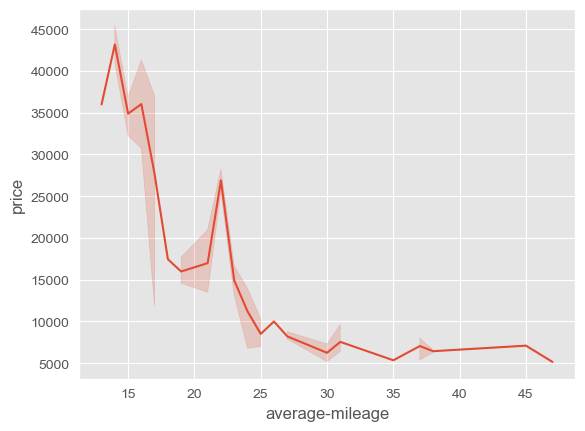

In [36]:
sns.lineplot(data=car_price, y="price", x="average-mileage")

The graph represents as Mileage is decreasing, Price is increasing. Hence, Conclusive

<b> Price Vs Horse Power </b>

<AxesSubplot:xlabel='horsepower', ylabel='price'>

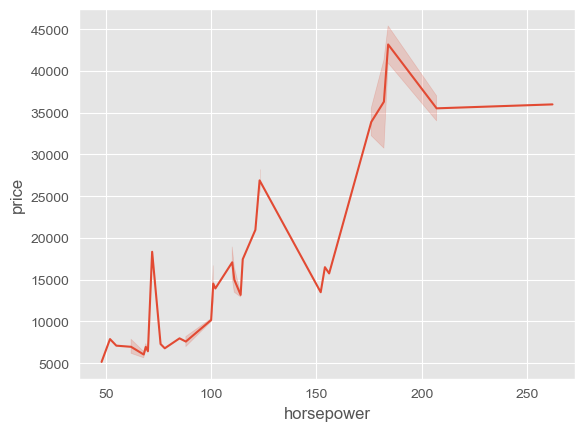

In [37]:
sns.lineplot(data=car_price, y="price", x="horsepower")

The graph represents as Price is highly dependent on Horsepower. Hence, Conclusive

<b> Price vs Body Style </b>

<AxesSubplot:xlabel='body-style', ylabel='price'>

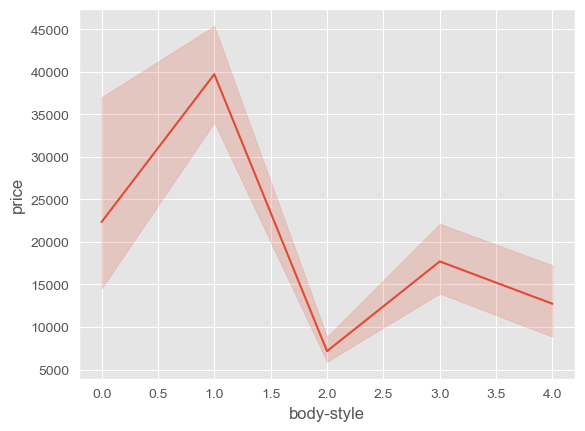

In [38]:
sns.lineplot(data=car_price, y="price", x="body-style")

The graph is highly inconclusive as major fluctuations are observed.

<b> Price vs Wheel Base </b>

<AxesSubplot:xlabel='wheel-base', ylabel='price'>

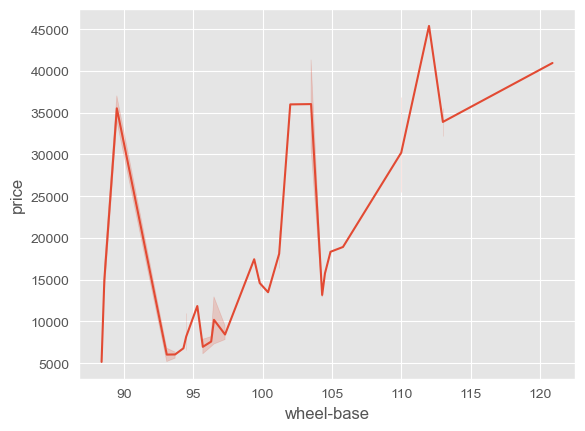

In [39]:
sns.lineplot(data=car_price, y="price", x="wheel-base")

The graph represents as Price is highly dependent on Horsepower. Hence, Conclusive

<b> Price vs Length </b>

<AxesSubplot:xlabel='length', ylabel='price'>

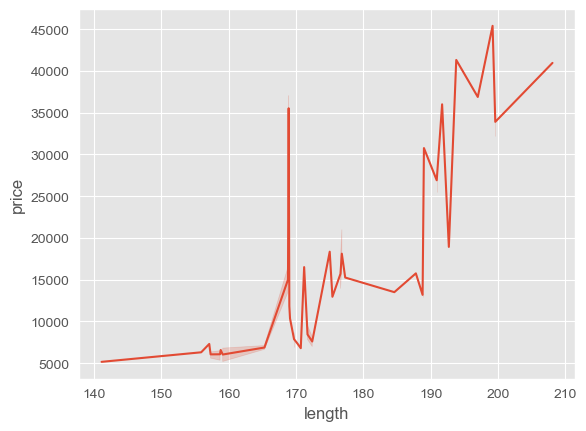

In [40]:
sns.lineplot(data=car_price, y="price", x="length")

The graph represents as Length is Increasing, Price is increasing. Hence, Conclusive

<b> Price vs Engine Type </b>

<AxesSubplot:xlabel='engine-type', ylabel='price'>

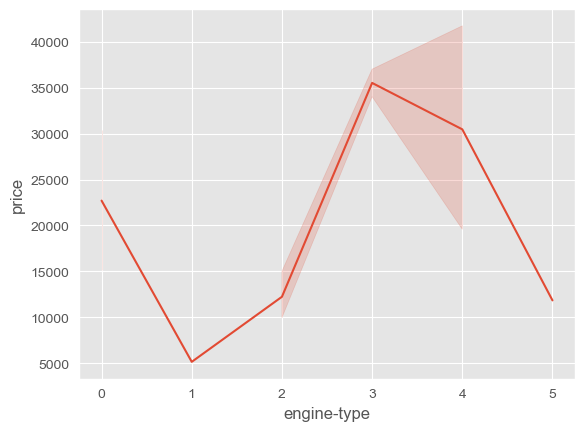

In [41]:
sns.lineplot(data=car_price, y="price", x="engine-type")

The graph is highly inconclusive as major fluctuations are observed.

<b> Visualization using PairPlot </b>

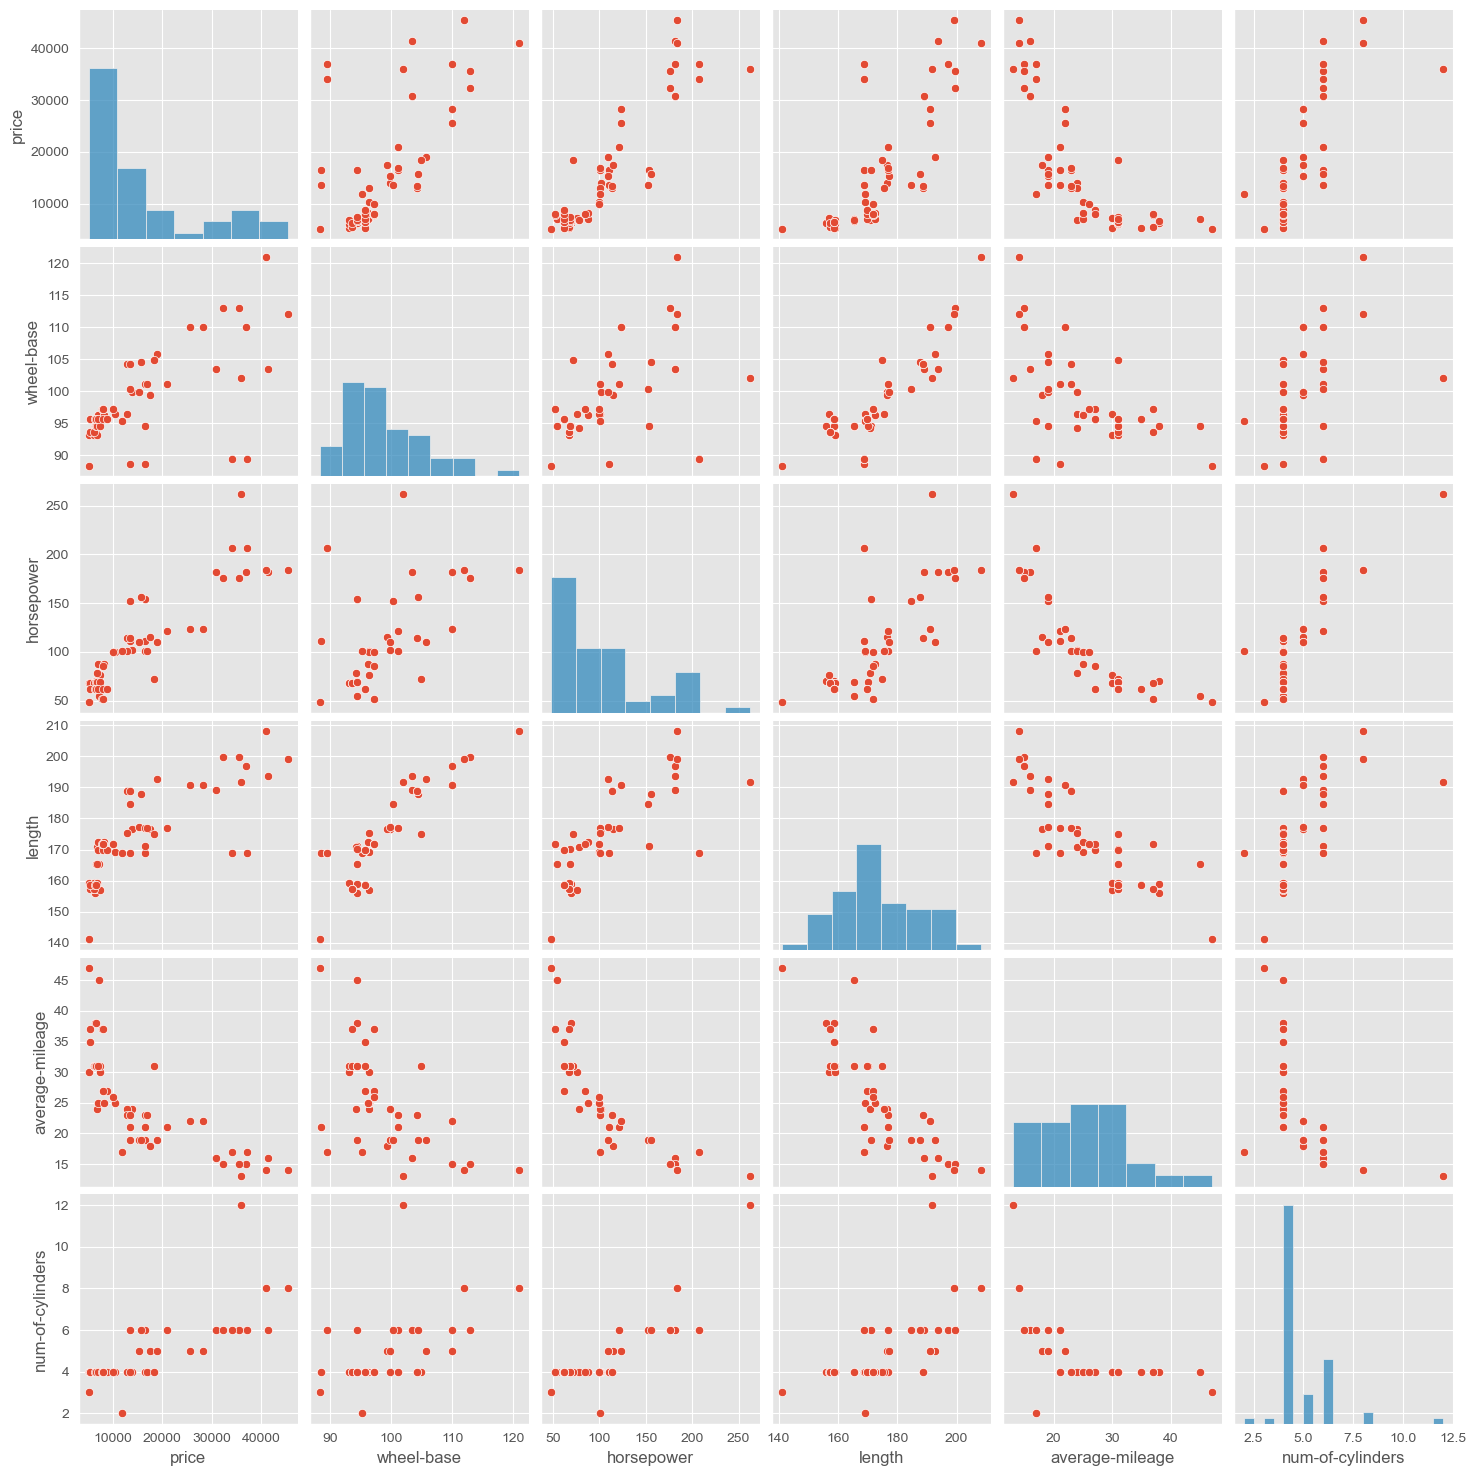

In [42]:
sns.pairplot(car_price[['price',
                       'wheel-base',
                       'horsepower',
                       'length',
                       'average-mileage',
                       'num-of-cylinders']])

<b> Splitting of dataset and selecting both target and features </b>

In [44]:
Y = car_price["price"] #target
X = car_price.drop(['company', 'engine-type', 'body-style', 'num-of-cylinders', 'price'], axis=1) #feature

<b> Displaying of Featured Data (X) </b>

In [45]:
X

,wheel-base,length,horsepower,average-mileage
index,,,,
0,88.6,168.8,111,21
1,88.6,168.8,111,21
2,94.5,171.2,154,19
3,99.8,176.6,102,24
4,99.4,176.6,115,18
5,99.8,177.3,110,19
6,105.8,192.7,110,19
9,101.2,176.8,101,23
10,101.2,176.8,101,23


<b> Displaying of Target Data (Y) </b>

In [46]:
Y

index
0     13495.0
1     16500.0
2     16500.0
3     13950.0
4     17450.0
5     15250.0
6     18920.0
9     16430.0
10    16925.0
11    20970.0
13    30760.0
14    41315.0
15    36880.0
16     5151.0
17     6295.0
18     6575.0
19     6377.0
20     6229.0
27     7295.0
28    12945.0
29    10345.0
30     6785.0
33    32250.0
34    35550.0
35    36000.0
36     5195.0
37     6095.0
38     6795.0
39    11845.0
43    18344.0
44    25552.0
45    28248.0
46    40960.0
47    45400.0
49     5389.0
50     6189.0
51     6989.0
52     8189.0
53     7099.0
54     6649.0
55     6849.0
56     7349.0
57    13499.0
61    34028.0
62    37028.0
66     5348.0
67     6338.0
68     6488.0
69     6918.0
70     7898.0
71     8778.0
79    15750.0
80     7775.0
81     7975.0
82     7995.0
86     9995.0
87    12940.0
88    13415.0
Name: price, dtype: float64

# Using of scikit-learn for predictive data analysis

Scikit-learn is a popular machine learning library for Python that provides a wide range of tools and algorithms for building predictive models. Its purpose is to provide a user-friendly and efficient platform for implementing various machine learning techniques, including classification, regression, clustering, and dimensionality reduction.

<b> Splliting of dataset using sklearn model </b>

In [47]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
X_train, X_test, Y_train, Y_test= train_test_split(X,
                                                   Y,
                                                  test_size=0.20,
                                                  random_state=0)

<b> Printing the shape of Train & Test Data </b>

In [48]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (46, 4)
X_test shape: (12, 4)
Y_train shape: (46,)
Y_test shape: (12,)


<b> Visualization of Train Value (X_train) </b>

In [49]:
X_train

,wheel-base,length,horsepower,average-mileage
index,,,,
43,104.9,175.0,72,31
55,94.5,165.3,69,31
46,120.9,208.1,184,14
56,94.5,170.2,69,31
52,96.3,172.4,88,25
9,101.2,176.8,101,23
17,94.5,155.9,70,38
45,110.0,190.9,123,22
39,95.3,169.0,101,17


<b> Mean Value of X_train </b>

In [50]:
X_train.mean()

wheel-base          98.300000
length             172.943478
horsepower         101.695652
average-mileage     26.065217
dtype: float64

<b> Standard Deviation (Std) Value of X_train </b>

In [51]:
X_train.std()

wheel-base          6.813483
length             13.391617
horsepower         47.209166
average-mileage     7.738510
dtype: float64

<b> Visualization of Test Value (X_test) </b>

In [52]:
X_test

,wheel-base,length,horsepower,average-mileage
index,,,,
50,93.7,157.3,68,31
49,93.7,157.3,68,37
57,100.4,184.6,152,19
38,93.1,159.1,68,31
14,103.5,193.8,182,16
2,94.5,171.2,154,19
47,112.0,199.2,184,14
66,95.7,158.7,62,35
33,113.0,199.6,176,15


<b> Mean value of X_test </b>

In [53]:
X_test.mean()

wheel-base          99.850000
length             176.341667
horsepower         122.750000
average-mileage     23.500000
dtype: float64

<b> Standard Deviation (Std) Value of X_test </b>

In [54]:
X_test.std()

wheel-base          6.954201
length             16.517124
horsepower         53.829909
average-mileage     8.681223
dtype: float64

# Purpose of Standard Scaler

The purpose of StandardScaler in Python is to standardize the features (i.e., the columns) of a dataset by subtracting the mean and dividing by the standard deviation. This is a common preprocessing step in machine learning and data analysis, as it can help to normalize the data and improve the performance of certain algorithms.

In [55]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

<b> Visualizing the data (for train) </b>

In [56]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1.])

<b> Visualizing the data (for test) </b>

In [57]:
X_test_scaled.std(axis=0)

array([0.98799878, 1.19393254, 1.10376266, 1.08593027])

<b> Importing and Fitting the model on the training data </b>

In [58]:
from sklearn.linear_model import LinearRegression

<b> Defining the model </b>

In [59]:
car_price_model = LinearRegression()

<b> Fitting the model on training data </b>

In [60]:
car_price_model.fit(X_train, Y_train)

LinearRegression()

<b> Checking the slope, m, and the intercept, c </b>

In [61]:
m = car_price_model.coef_
c = car_price_model.intercept_
m, c

(array([478.97437575, -53.29212774, 188.99835607,  83.89220487]),
 -44825.091360239174)

# <b> Target Prediction: Price against the predictors in the training and testing dataset </b>

<b> Predictions on the training data </b>

In [62]:
Y_predictions_train = car_price_model.predict(X_train)

<b> Predictions on the testing data </b>

In [63]:
Y_predictions_test = car_price_model.predict(X_test)

In [64]:
Y_predictions_test

array([ 7124.50251751,  7627.85574673, 23747.91119946,  6741.19206212,
       30160.71825667, 22014.07360644, 34154.43526312,  7209.4209732 ,
       33183.99814405,  6287.63874856, 16618.44246603, 30416.52046983])

<b> Comparison with original data </b>

In [65]:
Y_test.head()

index
50     6189.0
49     5389.0
57    13499.0
38     6795.0
14    41315.0
Name: price, dtype: float64

<b> Displaying Mean Square Error </b>

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

<b> Validation of the data </b>

In [67]:
mean_squared_error(Y_test, Y_predictions_test)

33146709.440118793

<b> Mean squared error between Y_train and Y_predictions_train </b>

In [68]:
mean_squared_error(Y_train, Y_predictions_train)

12285877.325452283

<b> Printing Mean Absolute Error </b>

In [69]:
from sklearn.metrics import mean_absolute_error, r2_score

<b> Mean Absolute Error Between Y_test and Y_prediction_test </b>

In [70]:
mean_absolute_error(Y_test, Y_predictions_test)

3832.6512434205015

<b> Mean Absolute Error Between Y_train and Y_predictions_train </b>

In [71]:
mean_absolute_error(Y_train, Y_predictions_train)

2687.669076419461

<b> Printing the accuracy of the testing data </b>

In [72]:
accuracy = r2_score(Y_test, Y_predictions_test)
print(f"The Model has an accuracy of {accuracy*100:.2f}%")

The Model has an accuracy of 83.28%


<b> Printing the accuracy of the training data </b>

In [73]:
accuracy = r2_score(Y_train, Y_predictions_train)
print(f"The Model has an accuracy of {accuracy*100:.2f}%")

The Model has an accuracy of 88.05%


<b> Coefficient Determination </b>

In [74]:
r2score_train= r2_score(Y_train, Y_predictions_train) #between Y_train & Y_predictions_train
r2score_train

0.8805244170212257

In [75]:
r2score_test= r2_score(Y_test, Y_predictions_test) #between Y_test & Y_predictions_test
r2score_test

0.8327602362222111

<b> Plotting the graph of Regression </b>

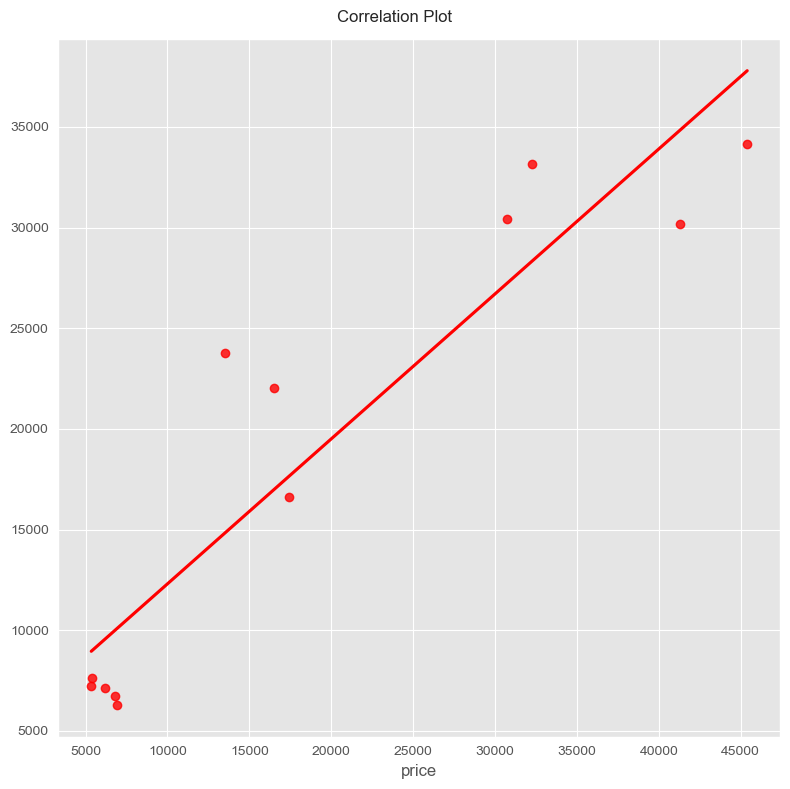

In [84]:
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
sns.regplot(x=Y_test, y=Y_predictions_test, ci=None, color="r")
plt.suptitle("Correlation Plot")
plt.tight_layout()
plt.show()

The performance of the model is not so good

<b> Displaying of Actual, Predictd and Error </b>

In [77]:
car_price = pd.DataFrame({"Actual": Y_test,
                       "Predicted": Y_predictions_test,
                       "Error": abs(Y_test-Y_predictions_test)})

car_price.head().style.background_gradient(cmap="RdYlGn")

,Actual,Predicted,Error
index,,,
50,6189.000000,7124.502518,935.502518
49,5389.000000,7627.855747,2238.855747
57,13499.000000,23747.911199,10248.911199
38,6795.000000,6741.192062,53.807938
14,41315.000000,30160.718257,11154.281743


In [85]:
car_price.Error.describe()

count       12.000000
mean      3832.651243
std       4487.253935
min         53.807938
25%        781.258463
50%       1398.461745
75%       6697.783005
max      11245.564737
Name: Error, dtype: float64

<b> Visualization of Actual, Predicted and Error Value for Car Price through Pair Plot </b>

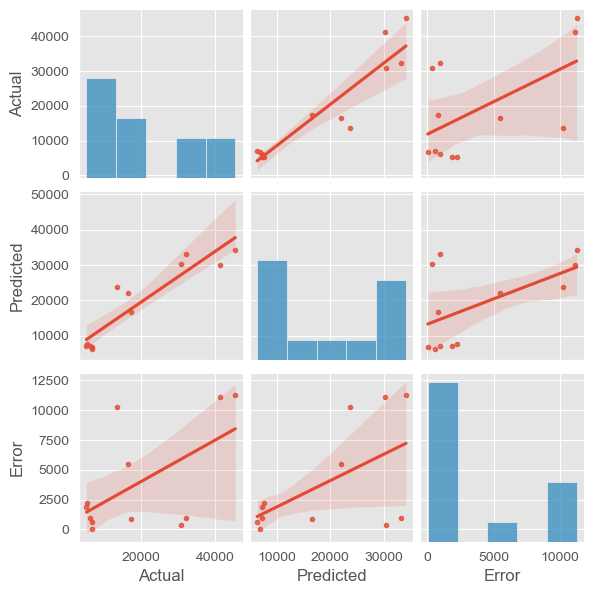

In [86]:
sns.pairplot(car_price.iloc[0:], kind="reg", height=2, markers=".")

<b> Visualization of Actual vs Predicted Value of Car Price </b>

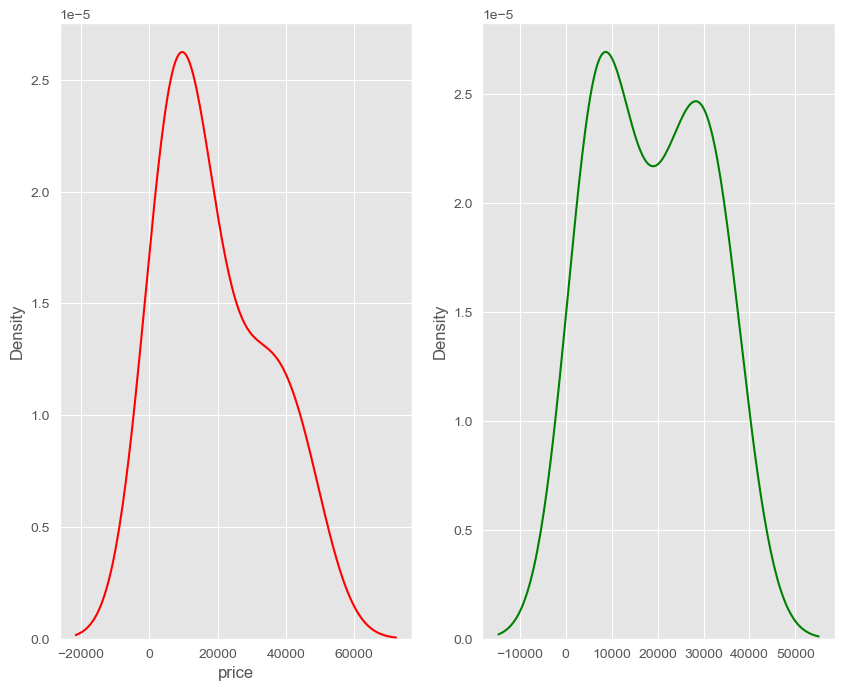

In [92]:
plt.figure(figsize=(10,8))
plt.subplot(121)
sns.kdeplot(Y_test, color="r", label="Actual Value")
plt.subplot(122)
sns.kdeplot(Y_predictions_test, color="green", label="Predicted Values")
plt.show()
plt.close()

<b> Scatter Plot Between Actual and Predicted Value </b>

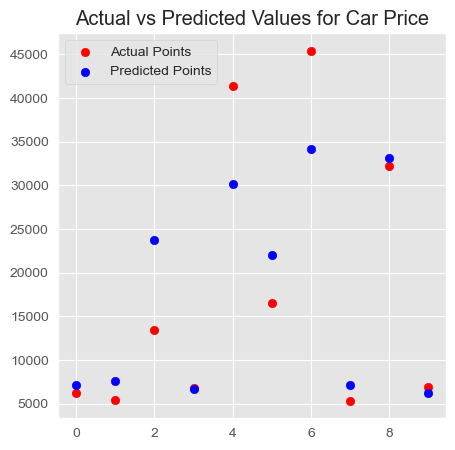

In [93]:
plt.figure(figsize=(5,5))
plt.style.use("ggplot")

plt.scatter(x=range(10),
            y=Y_test.head(10),
            color="r",
           label="Actual Points")
plt.scatter(x=range(10),
            y=Y_predictions_test[:10],
            color="b",
           label="Predicted Points")
plt.title('Actual vs Predicted Values for Car Price')
plt.legend()

<b> Dataframe of actual and predicted car price </b>

In [94]:
Car_Price=pd.DataFrame({
    "Actual Price":Y_test,
    "Predicted Price": Y_predictions_test
 })
print(Car_Price)

       Actual Price  Predicted Price
index                               
50           6189.0      7124.502518
49           5389.0      7627.855747
57          13499.0     23747.911199
38           6795.0      6741.192062
14          41315.0     30160.718257
2           16500.0     22014.073606
47          45400.0     34154.435263
66           5348.0      7209.420973
33          32250.0     33183.998144
69           6918.0      6287.638749
4           17450.0     16618.442466
13          30760.0     30416.520470
